In [38]:
import glob
import pandas as pd

path ='/Users/ryanpurcell/Desktop/LendingClub Combined Data/' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0,usecols=[*range(0,50)], encoding = "ISO-8859-1", low_memory = False,skiprows=[0])
    list_.append(df)
df= pd.concat(list_)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 230721 entries, 0 to 42537
Data columns (total 50 columns):
id                            5 non-null object
member_id                     0 non-null float64
loan_amnt                     230716 non-null float64
funded_amnt                   230716 non-null float64
funded_amnt_inv               230716 non-null float64
term                          230716 non-null object
int_rate                      230716 non-null object
installment                   230716 non-null float64
grade                         230716 non-null object
sub_grade                     230716 non-null object
emp_title                     216353 non-null object
emp_length                    221717 non-null object
home_ownership                230716 non-null object
annual_inc                    230712 non-null float64
verification_status           230716 non-null object
issue_d                       230716 non-null object
loan_status                   230716 non-null 

In [39]:
#df filter for 36 month term
#df['term']=df['term'].astype('str')
#termfilter= df['term'].str.contains('36')
#df=df.loc[termfilter]

In [40]:
#gradefilter=df['grade']=='A'
#df=df[gradefilter]

In [41]:
#from datetime import datetime, timedelta

#df['A'] = pd.to_datetime(df['last_pymnt_d'])
#df['A'].dtypes

In [42]:
#df['B'] = pd.to_datetime(df['issue_d'])
#df['B'].dtypes

In [43]:
#df['Difference'] = df['A'] - df['B']

In [44]:
#datefilter=df['Difference']<timedelta(days=180)

In [45]:
import numpy as np
df = df.assign(PopGroup=pd.cut(df.annual_inc,bins=[0,50000,100000,200000,np.inf],labels=['<=$50K','>$50K-$100K','>$100K-$200K','>$200K']))
a6=pd.pivot_table(df, index='PopGroup',values='funded_amnt', aggfunc=sum,fill_value=0).sort_values(by=['funded_amnt'],ascending = False)
c6=a6.reset_index()
d6=c6['PopGroup']
b6=c6['funded_amnt']
print(list(d6))
print(list(b6))

['>$50K-$100K', '<=$50K', '>$100K-$200K', '>$200K']
[1694423575, 762433725, 626444825, 77671000]


In [46]:
#df[['PopGroup','annual_inc']]
filter1 = df['PopGroup'] == '>$200K'
df[filter1]['annual_inc'].sort_values().head()

36908     200004.0
154575    200004.0
35092     200004.0
28819     200004.0
14574     200004.0
Name: annual_inc, dtype: float64

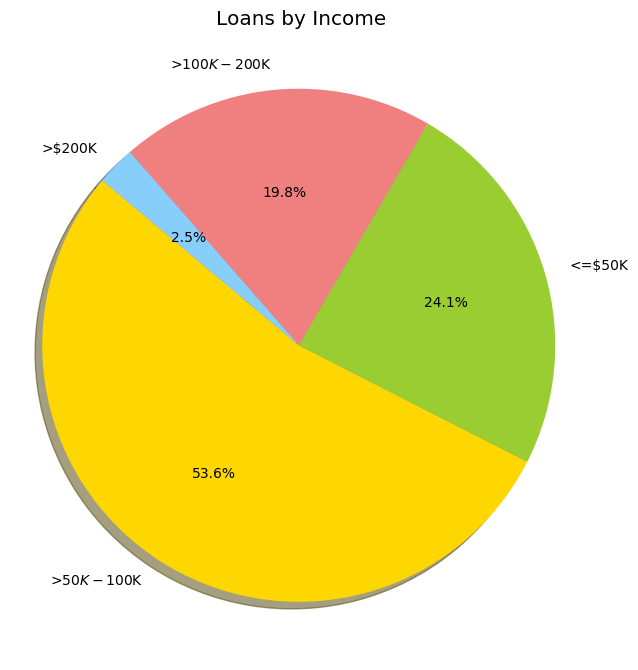

In [47]:
import matplotlib.pyplot as plt
 
# Data to plot
labels = list(d6)
sizes = list(b6)
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','palegreen','bisque','mediumturquoise','cadetblue','magenta','crimson','goldenrod']
#explode = (0.1, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.subplots_adjust(top=1.4, bottom=.1, left=.1, right=1, hspace=1,
                    wspace=.5)

plt.rcParams.update({'font.size': 12})
 
plt.axis('equal')
plt.title('Loans by Income')
plt.show()

In [48]:
df.groupby(['PopGroup'])['funded_amnt'].count().reset_index()

,PopGroup,funded_amnt
0,<=$50K,81195
1,>$50K-$100K,113529
2,>$100K-$200K,32581
3,>$200K,3407


In [49]:
#Charge Off Probability
Total=df.groupby(['PopGroup'])['funded_amnt'].count()
df1=df[(df.loan_status=='Charged Off')]
df2=df1.groupby(['PopGroup'])['funded_amnt'].count()
df3=(df2/Total).round(2)
df4=df3.reset_index()
df4=df4.sort_values(by=['funded_amnt'],ascending = False)
purpose = df4['PopGroup']
CO=df4['funded_amnt']
df4
#find out how to name the columns
#sort by default

,PopGroup,funded_amnt
0,<=$50K,0.18
1,>$50K-$100K,0.14
2,>$100K-$200K,0.11
3,>$200K,0.10


In [50]:
def format_func(value, tick_number): 
    # find number of multiples of pi/2 
    N = int(np.round(value*100)) 
    if N > 0: 
        return "{:}%".format(N) #// 2) 
    else: 
        return 0
    ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))

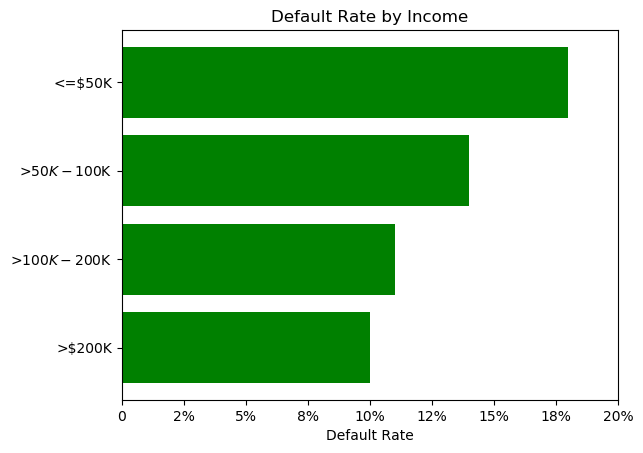

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Fixing random state for reproducibility
#np.random.seed(19680801)

plt.rcdefaults()
fig, ax = plt.subplots()

# Example data
people = purpose
y_pos = np.arange(len(people))
performance = CO
error = np.random.rand(len(people))

ax.barh(y_pos, performance, color = 'green', )#xerr=error, align='center')
        #color='green',ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Default Rate')
#ax.set_title('Default Rate by Loan Purpose')
ax.set_xlim(0,.2)
#plt.axvline(0.05, color='gray')
ax.xaxis.set_major_formatter(plt.FuncFormatter(format_func))
plt.title('Default Rate by Income')
plt.show()

In [52]:
df['performance']=(df['total_pymnt']/df['funded_amnt'])-1

In [53]:
#df filter for 36 month term
termfilterPurpose1= df['PopGroup'] == '<=$50K'
termfilterPurpose2= df['PopGroup'] != '<=$50K'
dfPurpose1=df.loc[termfilterPurpose1]
dfPurpose2=df.loc[termfilterPurpose2]

pf = dfPurpose1['performance']
pf1=dfPurpose2['performance']

import scipy.stats as st
st.ttest_ind(pf1.dropna(),pf.dropna())

Ttest_indResult(statistic=26.968329185787717, pvalue=6.1714870751885561e-160)

In [54]:
dfPurpose1['performance'].mean()

0.09278818595311462

In [55]:
dfPurpose2['performance'].mean()

0.12348024675337062